In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

followers_changes_df = pd.read_csv('/content/drive/MyDrive/FinalProject/FollowersChanges.csv')
followers_changes_df.drop(columns=['Unnamed: 0'], inplace=True)
followers_changes_df

,User_ID,Changed Field,Initial Value,Final Value,Delta,Number of Changes
0,@00x48x,Followers,2637,2629,-8.0,7
1,@03Chaberia,Followers,42,48,6.0,4
2,@0xFiro,Followers,3143,3208,65.0,6
3,@10WallStreet,Followers,1543,1555,12.0,7
4,@10to82ndPower,Followers,20,20,0.0,4
...,...,...,...,...,...,...
1926,@yvrdoran,Followers,1287,1289,2.0,1
1927,@zflixfootball,Followers,87,93,6.0,5
1928,@zismo64,Followers,5978,5991,13.0,7
1929,@zooppress,Followers,10,9,-1.0,1


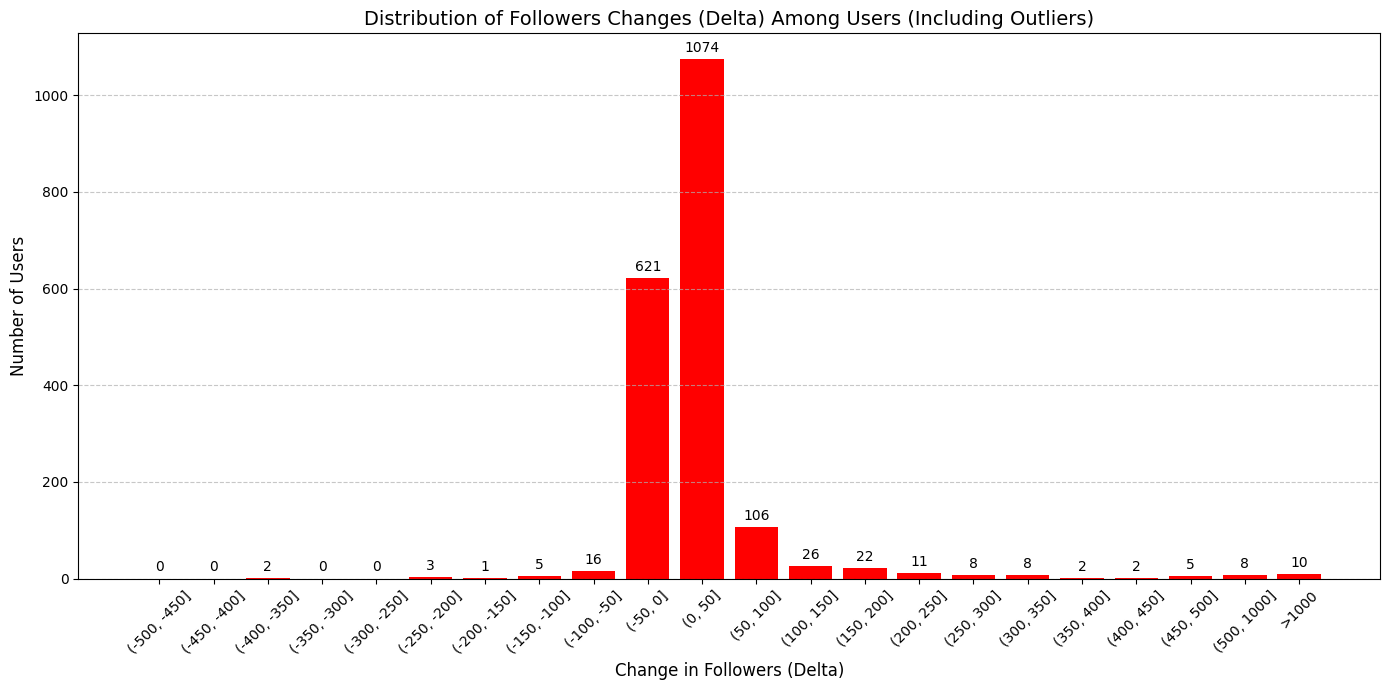

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter only rows with numeric delta values and drop NaNs
followers_changes_df = followers_changes_df[pd.to_numeric(followers_changes_df['Delta'], errors='coerce').notna()]
followers_changes_df['Delta'] = followers_changes_df['Delta'].astype(float)

# Define bins including outlier ranges
bins = list(range(-500, 550, 50)) + [1000, float('inf')]
labels = [f"({bins[i]}, {bins[i+1]}]" for i in range(len(bins)-2)]
labels += [">1000"]

followers_changes_df['Delta_Range'] = pd.cut(followers_changes_df['Delta'], bins=bins, labels=labels, include_lowest=False, right=True)

# Count number of users in each bin
distribution = followers_changes_df['Delta_Range'].value_counts().sort_index()

# Plot the histogram with value labels
plt.figure(figsize=(14, 7))
bars = plt.bar(distribution.index.astype(str), distribution.values, color='red')
plt.title('Distribution of Followers Changes (Delta) Among Users (Including Outliers)', fontsize=14)
plt.xlabel('Change in Followers (Delta)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
following_changes_df = pd.read_csv('/content/drive/MyDrive/FinalProject/FollowingChanges.csv')
following_changes_df.drop(columns=['Unnamed: 0'], inplace=True)
following_changes_df

,User_ID,Changed Field,Initial Value,Final Value,Delta,Number of Changes
0,@00x48x,Following,2610,2610,0.0,5
1,@03Chaberia,Following,184,200,16.0,3
2,@0Calamity,Following,6026,6036,10.0,4
3,@0xFiro,Following,756,766,10.0,3
4,@10WallStreet,Following,3236,3248,12.0,5
...,...,...,...,...,...,...
1579,@yogastephy,Following,702,717,15.0,6
1580,@yourworstnemywi,Following,597,599,2.0,3
1581,@yvrdoran,Following,4327,4343,16.0,1
1582,@zismo64,Following,6347,6339,-8.0,6


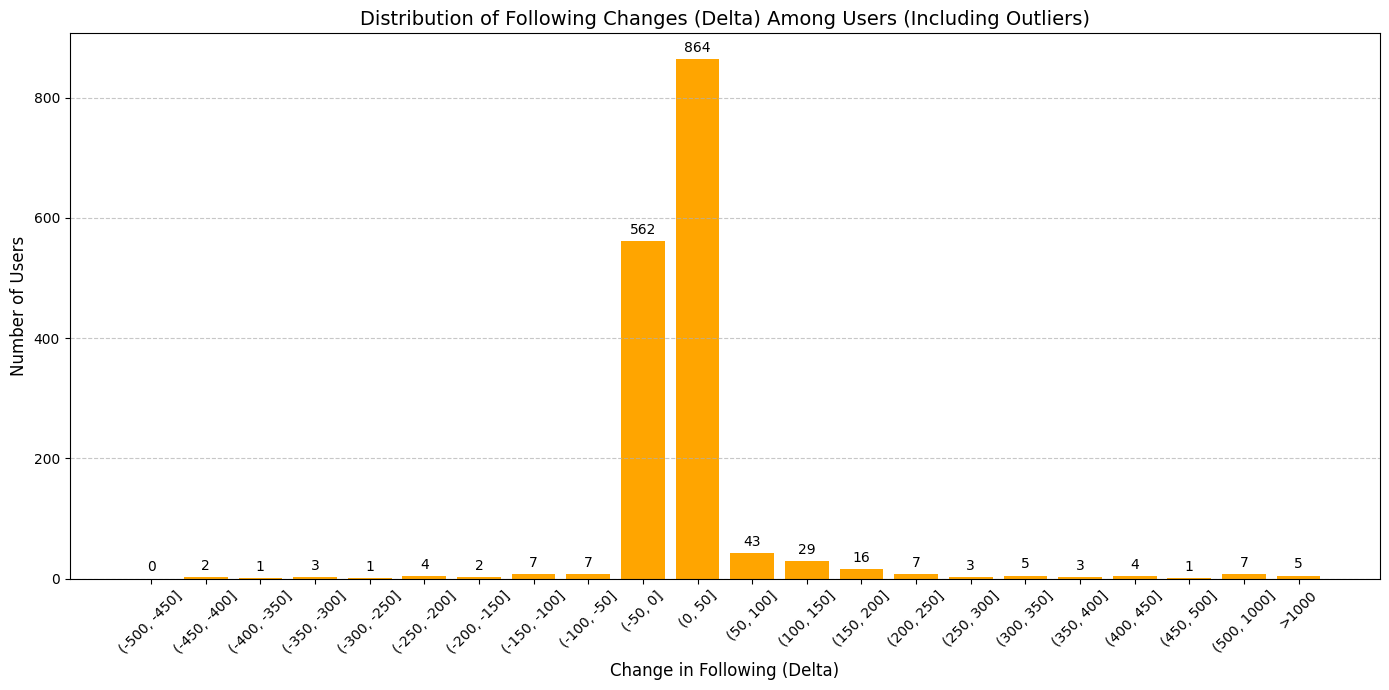

In [ ]:
# Filter only rows with numeric delta values and drop NaNs
following_changes_df = following_changes_df[pd.to_numeric(following_changes_df['Delta'], errors='coerce').notna()]
following_changes_df['Delta'] = following_changes_df['Delta'].astype(float)

# Define bins including outlier ranges
bins = list(range(-500, 550, 50)) + [1000, float('inf')]
labels = [f"({bins[i]}, {bins[i+1]}]" for i in range(len(bins)-2)]
labels += [">1000"]

# Bin the data
following_changes_df['Delta_Range'] = pd.cut(following_changes_df['Delta'], bins=bins, labels=labels, include_lowest=False, right=True)

# Count number of users in each bin
distribution = following_changes_df['Delta_Range'].value_counts().sort_index()

# Plot the histogram with value labels
plt.figure(figsize=(14, 7))
bars = plt.bar(distribution.index.astype(str), distribution.values, color='orange')
plt.title('Distribution of Following Changes (Delta) Among Users (Including Outliers)', fontsize=14)
plt.xlabel('Change in Following (Delta)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-9-3690352114.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  followers_count = combined_distribution['Followers Change'][i]
/tmp/ipython-input-9-3690352114.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  following_count = combined_distribution['Following Change'][i]


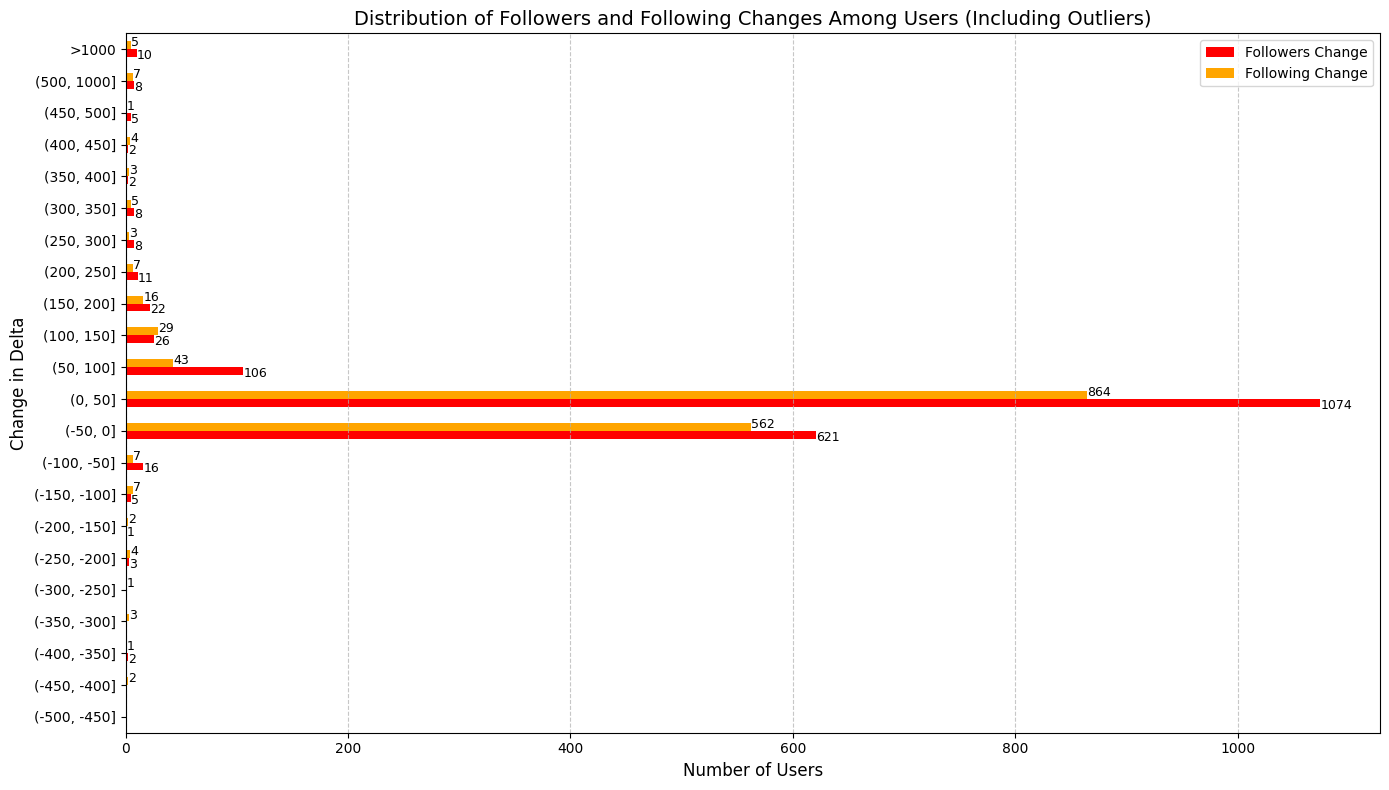

In [ ]:
# Re-define bins and labels to ensure consistency
bins = list(range(-500, 550, 50)) + [1000, float('inf')]
labels = [f"({bins[i]}, {bins[i+1]}]" for i in range(len(bins)-2)]
labels += [">1000"]

# Bin the data for both dataframes using the same bins and labels
followers_changes_df['Delta_Range'] = pd.cut(followers_changes_df['Delta'], bins=bins, labels=labels, include_lowest=False, right=True)
following_changes_df['Delta_Range'] = pd.cut(following_changes_df['Delta'], bins=bins, labels=labels, include_lowest=False, right=True)

# Count occurrences in each bin for both dataframes and ensure all labels are present
followers_distribution = followers_changes_df['Delta_Range'].value_counts().reindex(labels, fill_value=0)
following_distribution = following_changes_df['Delta_Range'].value_counts().reindex(labels, fill_value=0)

# Create a combined dataframe for plotting
combined_distribution = pd.DataFrame({
    'Followers Change': followers_distribution,'Following Change': following_distribution
    })

# Plot the combined horizontal histogram
plt.figure(figsize=(14, 8))
bars = combined_distribution.plot(kind='barh', color=['red', 'orange'], ax=plt.gca())

plt.title('Distribution of Followers and Following Changes Among Users (Including Outliers)', fontsize=14)
plt.xlabel('Number of Users', fontsize=12)
plt.ylabel('Change in Delta', fontsize=12)

# Add value labels next to each bar
for i in range(len(labels)):
    followers_count = combined_distribution['Followers Change'][i]
    following_count = combined_distribution['Following Change'][i]

    # Add label for followers count
    if followers_count > 0:
        plt.text(followers_count, i - 0.2, f'{int(followers_count)}', ha='left', va='center', fontsize=9)

    # Add label for following count
    if following_count > 0:
         plt.text(following_count, i + 0.2, f'{int(following_count)}', ha='left', va='center', fontsize=9)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
bio_changes_df = pd.read_csv('/content/drive/MyDrive/FinalProject/BioChanges.csv')
bio_changes_df.drop(columns=['Unnamed: 0'], inplace=True)
bio_changes_df

,User_ID,Changed Field,Initial Value,Final Value,Delta,Number of Changes
0,@10WallStreet,Bio,"@10WallStreet\n is Most #Blocked, #Flagged & #...",@10WallStreet\n is Most #Blocked & #Shadowbann...,3.0,1
1,@AUTHENCHECK,Bio,AUTHENCHECK® is an Elite Digital Asset bundle ...,AUTHENCHECK®,-139.0,1
2,@AhmedK2028,Bio,Executive Coach|Blockchain Advisor|Ex Co-found...,ExecCoach|BlockchainAdvisor|PermacultureDesign...,3.0,1
3,@Alpha_Bronze,Bio,"Corporate Access, IR & media firm working w/ g...","Corporate Access, IR & media firm working #Lif...",-2.0,1
4,@AngeloftheSeize,Bio,#Medic #BeVigilant #déjàvu Read #Constitution ...,#Medic #BeVigilant #déjàvu Read #Constitution ...,1.0,1
...,...,...,...,...,...,...
129,@vartha24,Bio,One of Biggest multi lingual News portal.\n#N...,One of Biggest multi lingual News portal. New...,-8.0,1
130,@viralposts2323,Bio,"Trending Now | Viral Vibes \n Breaking news, e...",Breaking News|Global News|India News|LIVE Upda...,-69.0,3
131,@visakhabar,Bio,Visa Khabar - Your Ultimate Visa News Destinat...,Visa Khabar - Trending News & Immigration Khab...,-34.0,1
132,@xcware,Bio,We provide a modern computing platform designe...,The only computing platform that unifies cloud...,11.0,1


In [ ]:
!pip install -q -U pandas openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 42.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.


In [ ]:
# Cleaning 'content' column from regex and stopwords
# Convert to lowercase

!pip install -q clean-text emoji
import re, emoji
from nltk.corpus import stopwords
from nltk import download
download("stopwords")

posts_by_users_df = pd.read_csv("/content/drive/MyDrive/FinalProject/posts_by_users.csv")

STOP = set(stopwords.words("english"))

def clean(tweet: str) -> str:
    t = emoji.replace_emoji(str(tweet), replace="")
    t = re.sub(r"http\S+|www\.\S+", " ", t)
    t = re.sub(r"@[A-Za-z0-9_]+", " ", t)
    t = re.sub(r"#", " ", t)
    t = re.sub(r"[^A-Za-z\s]", " ", t)
    t = " ".join(w for w in t.lower().split() if w not in STOP and len(w) > 2)
    return t

posts_by_users_df["content_clean"] = posts_by_users_df["content"].astype(str).apply(clean)
posts_by_users_df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,user_name,user_id,tweet_id,content,post_date,content_clean
0,_ Imposter_,@Imposter_Edits,1921038082091954437,This is so fuked,2025-05-10,fuked
1,_𝔇𝔢𝔞𝔱𝔥 𝔟𝔢𝔠𝔬𝔪𝔢𝔰 ℌ𝔢𝔯_,@CharcoalEpitaph,1912882401119818220,Canadians aren't listening though as the UN ha...,2025-04-17,canadians listening though declared maid track...
2,_GrandpaD__Old School Vegas,@_GrandPaD,1929266704934179296,It might be too dang hot to hang out at a #Las...,2025-06-01,might dang hot hang lasvegas pool right sahara...
3,_Prittyanna_,@_prittyanna_,1918767135377051764,Everyone’s out here chasing meme coins and mis...,2025-05-03,everyone chasing meme coins missing real utili...
4,_Prittyanna_,@_prittyanna_,1915409563953647788,I’m seriously pumped for this AMA! It’s not e...,2025-04-24,seriously pumped ama every day get hear direct...
...,...,...,...,...,...,...
120730,NaN,@herechigoes,1928265978372067700,Second apron finna run through this team like ...,2025-05-30,second apron finna run team like black plague
120731,NaN,@retrojay96,1928290759049892165,He too raw to be dating kylie atp he needs to ...,2025-05-30,raw dating kylie atp needs take racially ambig...
120732,NaN,@Hibzster,1928215053481746719,it’s ok to let things ends,2025-05-29,let things ends
120733,NaN,@SushiReggie,1923773882231574878,Listen to this,2025-05-17,listen


In [ ]:
!pip install -q bertopic sentence-transformers umap-learn hdbscan
from sentence_transformers import SentenceTransformer
embed_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Topic Modeling

from bertopic import BERTopic
topic_model = BERTopic(
    language        = "english",
    min_topic_size  = 500
)

texts = posts_by_users_df["content_clean"].astype(str).tolist()
topics = topic_model.fit_transform(texts)
topic_model.to_csv("/content/drive/MyDrive/FinalProject/topic_info.csv", index=False)

In [ ]:
topic_info_df = pd.read_csv("/content/drive/MyDrive/FinalProject/topic_info.csv")
topic_info_df

,Topic,Count,Name,Representation,Representative_Docs
0,-1,47392,-1_investing_stockmarket_stocks_new,"['investing', 'stockmarket', 'stocks', 'new', ...",['check cnxfinance analysis apr stocks stockma...
1,0,14654,0_trump_democrats_republicans_people,"['trump', 'democrats', 'republicans', 'people'...",['democrats promoting genocide white people tr...
2,1,7819,1_bitcoin_crypto_btc_cryptonews,"['bitcoin', 'crypto', 'btc', 'cryptonews', 'et...",['crypto etfs slip million outflow bitcoin mil...
3,2,7121,2_nba_gamblingx_prizepicks_free,"['nba', 'gamblingx', 'prizepicks', 'free', 'ml...",['today join free telegram gamblingx gamblingt...
4,3,5120,3_day_music_love_life,"['day', 'music', 'love', 'life', 'one', 'like'...",['positive thoughts create positive lives focu...
5,4,4768,4_gaza_israel_israeli_palestine,"['gaza', 'israel', 'israeli', 'palestine', 'pa...",['channel israeli military source said year fi...
6,5,4234,5_pakistan_india_indian_indiapakistanwar,"['pakistan', 'india', 'indian', 'indiapakistan...",['breaking first phone call india pakistan rep...
7,6,2928,6_covid_health_vaccine_vaccines,"['covid', 'health', 'vaccine', 'vaccines', 'ca...",['viral infections covid influenza cause heart...
8,7,2566,7_ukraine_russia_putin_russian,"['ukraine', 'russia', 'putin', 'russian', 'ukr...",['ukraine conflict russia war ukraine continue...
9,8,2553,8_target_btc_eth_signal,"['target', 'btc', 'eth', 'signal', 'altcoin', ...",['layerusdt entry target target join vip inves...


In [ ]:
ti = pd.read_csv("/content/drive/MyDrive/FinalProject/10topics_info.csv")
ti

,topic_major,Representation,tweet_count
0,climate,"['energy', 'renewableenergy', 'solar', 'electr...",2366
1,conflict,"['gaza', 'israel', 'israeli', 'palestine', 'pa...",12782
2,crypto,"['bitcoin', 'crypto', 'btc', 'cryptonews', 'et...",11200
3,economy,"['investing', 'stockmarket', 'stocks', 'new', ...",50197
4,education,"['learning', 'edtech', 'education', 'students'...",1346
5,health,"['covid', 'health', 'vaccine', 'vaccines', 'ca...",5107
6,lifestyle,"['music', 'love', ‘life', 'happy', ‘good', 'do...",6733
7,politics,"['trump', 'democrats', 'republicans', 'people'...",18005
8,religion,"['god', 'jesus', 'bible', 'jesuschrist', 'fait...",1807
9,sports,"['nba', 'gamblingx', 'prizepicks', 'free', 'ml...",7121


על מנת לאפיין את תחומי העניין של המשתמשים בנינו מודל לזיהוי נושאים המבוסס על BERTopic.

תחילה ניקינו את מלל הציוצים (הסרת כתובות,סימני פיסוק,stopwords והמרה לאותיות קטנות).

לכל אשכול הופק שם אוטומטי על פי המילים בעלות ה TF-IDF הגבוה ביותר ואלחר מכן איחדנו אשכולות דומים לכ 10 נושאים עיקריים.

לבסוף סווג כל ציוץ לנושא שבו בהופיעו מירב
 מילות המפתח וקיבלנו 2 פיצרים:

num_topics – מספר הנושאים הייחודיים שבהם צייץ
dominant_topic – הנושא השכיח עבורו.

 מודל זה סיפק תשתית לכימות גיוון-התוכן ולזיהוי שינויים תחומיים בפרופיל לאורך זמן.


In [ ]:
# Classification of every tweet we collected to a topic

OUTPUT_CSV = "/content/drive/MyDrive/FinalProject/posts_classified.csv"

import pandas as pd, re, ast, string

ti.columns = [c.strip() for c in ti.columns]
posts_by_users_df.columns = [c.strip() for c in posts_by_users_df.columns]

assert {"Name", "Representation"}.issubset(topic_info_df.columns)
assert {"user_id", "content_clean"}.issubset(posts_by_users_df.columns)

def parse_rep(rep: str):
    rep = str(rep).strip().lower()
    if not rep:
        return []
    try:
        parsed = ast.literal_eval(rep)
        tokens = parsed if isinstance(parsed, (list, tuple)) else [parsed]
    except Exception:
        tokens = re.split(r"[,\s;]+", rep)
    tokens = [t.strip(string.punctuation) for t in tokens if t.strip(string.punctuation)]
    return tokens

topic_kw = {}
for _, row in ti.iterrows():
    topic = str(row["topic_major"]).strip()
    topic_kw.setdefault(topic, []).extend(parse_rep(row["Representation"]))

topic_kw = {t: sorted(set(kws)) for t, kws in topic_kw.items() if kws}

patterns = {
    t: re.compile(r"\b(" + "|".join(map(re.escape, kws)) + r")\b", re.I)
    for t, kws in topic_kw.items()
}

counts = {
    t: posts_by_users_df["content_clean"].str.count(pat)
    for t, pat in patterns.items()
}
counts_df = pd.DataFrame(counts).fillna(0).astype(int)

posts_by_users_df["topic"] = counts_df.idxmax(axis=1)
posts_by_users_df.loc[counts_df.max(axis=1) == 0, "topic"] = "Other"

posts_by_users_df["topic_change"] = (
    posts_by_users_df["topic"] != posts_by_users_df.groupby("user_id")["topic"].transform("first")
).astype(int)

posts_by_users_df["post_date"] = pd.to_datetime(posts_by_users_df["post_date"], errors="coerce")

posts_by_users_df = (
    posts_by_users_df.sort_values(["user_id", "post_date"])
      .reset_index(drop=True)
)

posts_by_users_df.to_csv(OUTPUT_CSV, index=False)
posts_by_users_df

,user_name,user_id,tweet_id,content,post_date,content_clean,topic,topic_change
0,ĐøƤĕỸ @,@,1819514767616180686,Stream is starting soon! \n\n http://twitch.tv...,2024-08-02,stream starting soon twitch xbox idatxbox neck...,Other,0
1,00,@00x48x,1906822188520337619,"Trump has brought the entire global economy, i...",2025-03-31,trump brought entire global economy including ...,economy,1
2,00,@00x48x,1906806579019792723,Michael Saylor’s Strategy Loses $3 Billion in ...,2025-03-31,michael saylor strategy loses billion months w...,crypto,1
3,00,@00x48x,1906781116960264542,Circle Prepares for IPO With Help from JP Morg...,2025-03-31,circle prepares ipo help morgan citi circle en...,lifestyle,1
4,00,@00x48x,1906774172874817977,Gold stocks in US warehouses set new records a...,2025-03-31,gold stocks warehouses set new records amid ta...,economy,1
...,...,...,...,...,...,...,...,...
120730,Yan is GIRL SO CONFUSING @ CONCLAVE,Yan is GIRL SO CONFUSING @ CONCLAVE,1920547268215603647,NO IT REALLY WAS LMFAO DURING THE DISCORD CALL...,2025-05-08,really lmfao discord call like crowd silent,Other,1
120731,Year 4 @ Roby Park Primary,Year 4 @ Roby Park Primary,1886026732785860737,Year 4 was fortunate enough to land on a S.T.E...,2025-02-02,year fortunate enough land day classopoly boar...,Other,0
120732,jyoti jmbhatt@bsky.social,jyoti jmbhatt@bsky.social,1921085072964272601,Reciprocal rhythm...,2025-05-10,reciprocal rhythm,Other,0
120733,ladidai (@ladidaix) see linkinbyeo,ladidai (@ladidaix),1920993012789694744,This not weird to y’all???,2025-05-10,weird,Other,0


In [ ]:
# Count by topic

#df = pd.read_csv("/content/drive/MyDrive/FinalProject/posts_classified.csv")
topic_counts = posts_by_users_df["topic"].value_counts().reset_index()
topic_counts.columns = ["topic", "tweet_count"]
topic_counts

,topic,tweet_count
0,Other,35385
1,conflict,16623
2,economy,13825
3,crypto,13754
4,politics,11896
5,lifestyle,6531
6,health,5491
7,climate,4767
8,tech,4606
9,sports,3892


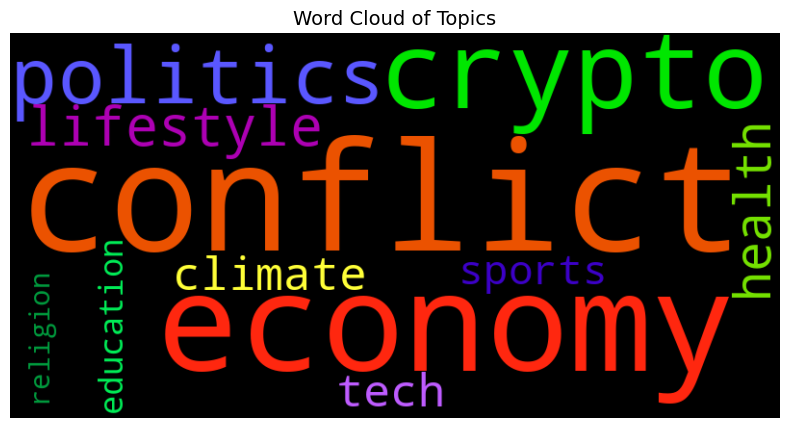

In [ ]:
!pip install wordcloud matplotlib numpy
from wordcloud import WordCloud
import random

filtered_ti = topic_counts[topic_counts['topic'] != 'Other']

# Create a dictionary for the word cloud
topic_freq = dict(zip(filtered_ti['topic'], filtered_ti['tweet_count']))

# Custom color function to assign different colors
def random_color_func(word=None, font_size=None, position=None, orientation=None, random_state=None, **kwargs):
    return f"hsl({random.randint(0, 360)}, 100%, {random.randint(30, 70)}%)"

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',  # Colormap is used for varying shades within a color or can be overridden by color_func
    prefer_horizontal=0.5, # Adjust this value to control the proportion of horizontal words
    color_func=random_color_func
).generate_from_frequencies(topic_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Topics', fontsize=14)
plt.show()

In [ ]:
user_date_range_df = posts_by_users_df.groupby('user_id')['post_date'].agg(['min', 'max'])
user_date_range_df['days_active'] = (user_date_range_df['max'] - user_date_range_df['min']).dt.days + 1
user_date_range = user_date_range_df.reset_index()
user_date_range_df.to_csv('/content/drive/MyDrive/FinalProject/user_days_active.csv', index=False)
user_date_range_df


,min,max,days_active
user_id,,,
@,2024-08-02,2024-08-02,1.0
@00x48x,2025-03-31,2025-04-16,17.0
@0Calamity,2025-05-03,2025-05-03,1.0
@0EROPROTOCOL,2023-03-06,2023-03-06,1.0
@0bj3ctivity,2025-05-31,2025-05-31,1.0
...,...,...,...
Yan is GIRL SO CONFUSING @ CONCLAVE,2025-05-08,2025-05-08,1.0
Year 4 @ Roby Park Primary,2025-02-02,2025-02-02,1.0
jyoti jmbhatt@bsky.social,2025-05-10,2025-05-10,1.0


In [ ]:
import pandas as pd

# --- Load classified tweets ---------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/FinalProject/posts_classified.csv")


# how many different topics + how many tweets
user_topics_df = (
    df.groupby("user_id")
      .agg(num_topics   = ("topic", "nunique"),
           total_tweets = ("topic", "size"))
)

# dominant topic (the most frequent label for the user)
dominant_topic = (
    df.groupby("user_id")["topic"]
      .agg(lambda s: s.value_counts().idxmax())
      .rename("dominant_topic")
)

user_topics_df = (
    user_topics_df
      .join(dominant_topic)
      .reset_index()
      .sort_values(["num_topics", "total_tweets"], ascending=False)
)

user_topics_df["dominant_topic_id"] = (
    user_topics_df["dominant_topic"]
        .astype("category")
        .cat.codes
)

topic_id_map = (
    user_topics_df[["dominant_topic", "dominant_topic_id"]]
      .drop_duplicates()
      .sort_values("dominant_topic_id")
)

user_topics_df.drop(columns=["dominant_topic"], inplace=True)

user_topics_df.to_csv("/content/drive/MyDrive/FinalProject/user_topics.csv",
                      index=False)

user_topics_df

,user_id,num_topics,total_tweets,dominant_topic_id
3005,@HopewellGMaria,12,571,8
4163,@MadhusudanAch12,12,385,0
2768,@Global_NewsWire,12,373,2
6773,@ThomaMore,12,317,2
11271,@tultican,12,260,5
...,...,...,...,...
11627,Stephen Spurling Is... @Drangula,1,1,8
11631,Year 4 @ Roby Park Primary,1,1,0
11632,jyoti jmbhatt@bsky.social,1,1,0
11633,ladidai (@ladidaix),1,1,0


In [ ]:
user_topics_df = pd.merge(user_topics_df, user_date_range_df[['days_active']], on='user_id', how='left')
user_topics_df.to_csv("/content/drive/MyDrive/FinalProject/user_topics.csv", index=False)
user_topics_df

,user_id,num_topics,total_tweets,dominant_topic_id,days_active
0,@HopewellGMaria,12,571,8,36.0
1,@MadhusudanAch12,12,385,0,18.0
2,@Global_NewsWire,12,373,2,19.0
3,@ThomaMore,12,317,2,13.0
4,@tultican,12,260,5,48.0
...,...,...,...,...,...
11630,Stephen Spurling Is... @Drangula,1,1,8,1.0
11631,Year 4 @ Roby Park Primary,1,1,0,1.0
11632,jyoti jmbhatt@bsky.social,1,1,0,1.0
11633,ladidai (@ladidaix),1,1,0,1.0


In [ ]:
user_topics_df['tweets_per_day'] = user_topics_df['total_tweets'] / user_topics_df['days_active']
user_topics_df.to_csv("/content/drive/MyDrive/FinalProject/user_topics.csv", index=False)
user_topics_df

,user_id,num_topics,total_tweets,dominant_topic_id,days_active,tweets_per_day
0,@HopewellGMaria,12,571,8,36.0,15.861111
1,@MadhusudanAch12,12,385,0,18.0,21.388889
2,@Global_NewsWire,12,373,2,19.0,19.631579
3,@ThomaMore,12,317,2,13.0,24.384615
4,@tultican,12,260,5,48.0,5.416667
...,...,...,...,...,...,...
11630,Stephen Spurling Is... @Drangula,1,1,8,1.0,1.000000
11631,Year 4 @ Roby Park Primary,1,1,0,1.0,1.000000
11632,jyoti jmbhatt@bsky.social,1,1,0,1.0,1.000000
11633,ladidai (@ladidaix),1,1,0,1.0,1.000000


In [ ]:
# Features table

user_topics = pd.read_csv("/content/drive/MyDrive/FinalProject/user_topics.csv")[["user_id", "num_topics","dominant_topic_id","tweets_per_day"]]

following_change = (
    pd.read_csv("/content/drive/MyDrive/FinalProject/FollowingChanges.csv")
      .rename(columns={"Delta": "delta_following_changes","User_ID":"user_id"})
      [["user_id", "delta_following_changes"]]
)

followers_change = (
    pd.read_csv("/content/drive/MyDrive/FinalProject/FollowersChanges.csv")
      .rename(columns={"Delta": "delta_followers_changes","User_ID":"user_id"})
      [["user_id", "delta_followers_changes"]]
)

bio_change = (
    pd.read_csv("/content/drive/MyDrive/FinalProject/BioChanges.csv")
      .rename(columns={"Delta": "delta_bio_changes","User_ID":"user_id"})
      [["user_id", "delta_bio_changes"]]
)

master = user_topics \
    .merge(following_change,on="user_id", how="left") \
    .merge(followers_change,on="user_id", how="left") \
    .merge(bio_change,on="user_id", how="left")

master[["delta_following_changes",
        "delta_followers_changes",
        "delta_bio_changes"]] = master[[
        "delta_following_changes",
        "delta_followers_changes",
        "delta_bio_changes"]].fillna(0).astype(int)

master.to_csv("/content/drive/MyDrive/FinalProject/master.csv", index=False)
master

,user_id,num_topics,dominant_topic_id,tweets_per_day,delta_following_changes,delta_followers_changes,delta_bio_changes
0,@HopewellGMaria,12,8,15.861111,22,68,0
1,@MadhusudanAch12,12,0,21.388889,132,29,-3
2,@Global_NewsWire,12,2,19.631579,-9,126,4
3,@ThomaMore,12,2,24.384615,78,28,0
4,@tultican,12,5,5.416667,4,12,0
...,...,...,...,...,...,...,...
11630,Stephen Spurling Is... @Drangula,1,8,1.000000,0,0,0
11631,Year 4 @ Roby Park Primary,1,0,1.000000,0,0,0
11632,jyoti jmbhatt@bsky.social,1,0,1.000000,0,0,0
11633,ladidai (@ladidaix),1,0,1.000000,0,0,0


Best k by silhouette = 12


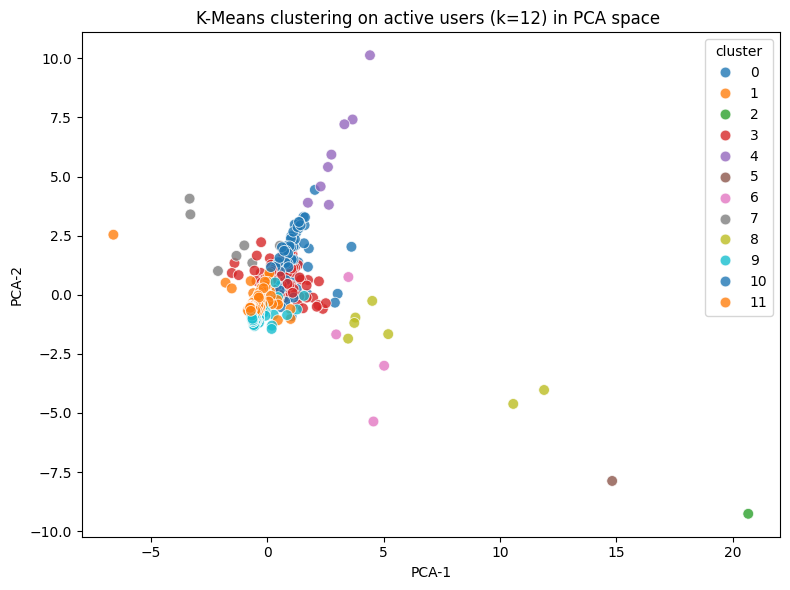

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/FinalProject/master.csv")

features = ["num_topics",
            "dominant_topic_id",
            "tweets_per_day",
            "delta_following_changes",
            "delta_followers_changes",
            "delta_bio_changes"
            ]


df["activity_level"] = pd.cut(
        df["tweets_per_day"],
        bins=[0, 1, 5, np.inf],
        labels=["low", "medium", "high"],
        right=True, include_lowest=True
        )

active_df = df[df["activity_level"].isin(["medium", "high"])].copy()
active_df

def get_best_k(k_min=2, k_max=20):

    pipeline = make_pipeline(
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler()
    )

    X_scaled = pipeline.fit_transform(active_df[features])

    silhouette_scores = []
    range_k = range(k_min, k_max + 1)

    for k in range_k:
        km = KMeans(n_clusters=k, random_state=42, n_init="auto")
        labels = km.fit_predict(X_scaled)
        silhouette_scores.append(silhouette_score(X_scaled, labels))

    best_k = range_k[np.argmax(silhouette_scores)]
    print(f"Best k by silhouette = {best_k:.0f}")

    px.line(x=list(range_k), y=silhouette_scores,
            labels={"x": "k", "y": "silhouette"},
            title="Silhouette score vs k (active users)").show()

    return active_df, X_scaled, best_k

def plot_clusters(active_df, X_scaled, k, title_suffix=""):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    active_df["kmeans_cluster"] = km.fit_predict(X_scaled)

    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    active_df["pca1"], active_df["pca2"] = X_pca[:, 0], X_pca[:, 1]

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=active_df, x="pca1", y="pca2",
                    hue="kmeans_cluster", palette="tab10", s=60, alpha=.8)
    plt.title(f"K-Means clustering on active users (k={k}) in PCA space {title_suffix}")
    plt.xlabel("PCA-1"); plt.ylabel("PCA-2"); plt.legend(title="cluster")
    plt.tight_layout(); plt.show()

    fig = px.scatter(active_df, x="pca1", y="pca2",
                     color="kmeans_cluster",
                     hover_data=["user_id", "tweets_per_day", "num_topics"],
                     title=f"PCA projection with K-Means clusters (k={k})")
    fig.show()

    active_df.to_csv(f"master_with_clusters_k{k}.csv", index=False)
    return active_df

active_df, X_scaled, best_k = get_best_k()
chosen_k = best_k
df_clustered = plot_clusters(active_df, X_scaled, chosen_k)

 . הכנת הדאטה

•	סינון משתמשים פעילים – נשמרים רק משתמשים שמפרסמים ≥ 1 ציוץ ליום (קטגוריות medium ו-high).

•	פיצ’רים נומריים:
1.	num_topics – מספר נושאי-התוכן הייחודיים של המשתמש.
2.	dominant_topic_id – מזהה מספרי של הנושא הדומיננטי (One-Hot → Index).
3.	tweets_per_day – קצב ציוץ ממוצע.
4.	delta_following_changes – שינוי נטו במנויים־נעקבים.
5.	delta_followers_changes – שינוי נטו בעוקבים.
6.	delta_bio_changes – מספר עדכוני ביוגרפיה.


בחירת k

•	מריצים K-Means עבור ‎k = 2…20.

•	מחשבים Silhouette Score לכל k, ובוחרים את k_{best} שבו המדד מקסימלי.

בגרף – ניתן לראות שה-Silhouette מגיע לשיא≈0.45 סביב k = 11–12, ומשם יורד; לכן נבחר k = 12.

המחשה ב-PCA

•	מצמצמים את 6 הפיצ’רים לשתי קומפוננטות באמצעות PCA(n_components=2).

•	מציגים את הנקודות במרחב (PCA-1 , PCA-2) וצובעים לפי האשכול.

התרשים מראה כי רוב המשתמשים מרוכזים סביב המרכז, בעוד מספר אשכולות קטנים (“זנבות”) מורכבים ממשתמשים עם פעילות קיצונית – לדוגמה קצב ציוץ גבוה במיוחד או תנודות חריגות בעוקבים.

פירוש הגרפים

1.	Silhouette score vs k

•	קו העילית מצביע על k = 12 כאופטימלי.

•	ירידה חדה אחרי k = 12 מעידה שהוספת אשכולות מעבר לכך מחלקת תת-קבוצות דומות ומקטינה את נבדלותן.

2.	תרשים PCA צבעוני (seaborn)

•	הצפיפות הגבוהה במרכז → רוב המשתמשים מתנהגים דומה (ציוצים בודדים ביום, מעט נושאים).

•	נקודות מרוחקות: משתמשים “אקסצנטריים” – או סופר-פעילים (PCA-1 גבוה) או עם שינויים חריגים בעוקבים/ביוגרפיה (PCA-2 קיצוני).


3.	Plotly-interactive

•	מאפשר לרחף על כל נקודה ולראות user_id, tweets_per_day ו-num_topics.

•	שימושי לזיהוי ידני של חשבונות חריגים לחקירה עומק (למשל בוטים או חשבונות ששינו זהות).


 מה למדנו?

•	התפלגות טבעית: ~90 % מהמשתמשים שייכים ל-3–4 אשכולות “נורמליים”; השאר – אשכולות שוליים עם דפוסי פעילות יוצאי דופן.

•	ניבוי שינויי זהות: אשכולות עם Δ-עוקבים גדול + עדכוני-bio רבים עשויים לסמן חשבונות שעוברים מיתוג-מחדש, רכישה או התנהגות לא אותנטית.

•	תרומת הנושא הדומיננטי: שילוב dominant_topic_id עזר להפריד משתמשים שמעלים תכנים דומים אך בקצבי פעילות שונים

In [ ]:
import pandas as pd

df = pd.read_csv("master_with_clusters_k12.csv")
cluster_counts = (
    df["kmeans_cluster"]
      .value_counts()
      .rename("n_users")
)

cluster_medians = (
    df.groupby("kmeans_cluster")[[
        "num_topics",
        "dominant_topic_id",
        "tweets_per_day",
        "delta_followers_changes",
        "delta_following_changes",
        "delta_bio_changes"
    ]]
    .median()
)

summary_df = (
    cluster_medians
      .join(cluster_counts)
      .reset_index()
      .sort_values("kmeans_cluster")
)

summary_df

,kmeans_cluster,num_topics,dominant_topic_id,tweets_per_day,delta_followers_changes,delta_following_changes,delta_bio_changes,n_users
0,0,8.0,8.0,4.828341,12.0,1.0,0.0,88
1,1,2.0,0.0,2.000000,0.0,0.0,0.0,474
2,2,10.0,2.0,16.000000,3002.0,2921.0,-69.0,1
3,3,8.0,0.0,3.966667,4.0,0.0,0.0,252
4,4,9.5,1.0,90.500000,18.0,0.5,0.0,8
5,5,7.0,11.0,3.354839,6532.0,25.0,0.0,1
6,6,9.0,0.0,4.524927,12.0,0.0,-102.0,4
7,7,9.0,2.0,3.810811,8.0,1.0,49.0,7
8,8,8.0,0.0,8.866667,175.0,929.0,0.0,7
9,9,2.0,8.0,2.000000,0.0,0.0,0.0,161


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

features = ["num_topics","dominant_topic_id","tweets_per_day",
            "delta_following_changes",
            "delta_followers_changes","delta_bio_changes"]

pca = PCA(n_components=2).fit(X_scaled)
loadings = pd.DataFrame(pca.components_,
                        columns=features,
                        index=["PCA1","PCA2"])
print(loadings.T.round(3))

                          PCA1   PCA2
num_topics               0.408  0.545
dominant_topic_id        0.045 -0.219
tweets_per_day           0.305  0.644
delta_following_changes  0.586 -0.281
delta_followers_changes  0.542 -0.285
delta_bio_changes       -0.319  0.282
